In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Load the CSV file with latitude and longitude data
accident_path = Path('../Cleaned_Datasets/master_accident_cleaned.csv')
# Read the CSV file
accident_data = pd.read_csv(accident_path, low_memory=False)

In [3]:
accident_df = pd.DataFrame(accident_data)
accident_df.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident_Type_Desc,DAY_OF_WEEK,Day_Week_Description,DCA_CODE,DCA_Description,LIGHT_CONDITION,...,NODE_ID,NODE_TYPE,LGA_NAME,REGION_NAME,DEG_URBAN_NAME,Lat,Long,POSTCODE_NO,Atmosph_Cond_Desc,Surface_Cond_Desc
0,T20060000010,13/01/2006,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,...,43078.0,I,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,Dry
1,T20060000018,13/01/2006,19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,...,29720.0,N,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,Dry
2,T20060000022,14/01/2006,12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,1,...,203074.0,N,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,RURAL_VICTORIA,-38.396320,144.854890,3939.0,Clear,Dry
3,T20060000023,14/01/2006,11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),1,...,55462.0,I,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.989185,145.144961,3172.0,Clear,Dry
4,T20060000026,14/01/2006,10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,1,...,202988.0,N,MORNINGTON PENINSULA,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-38.372990,144.871594,3940.0,Clear,Dry


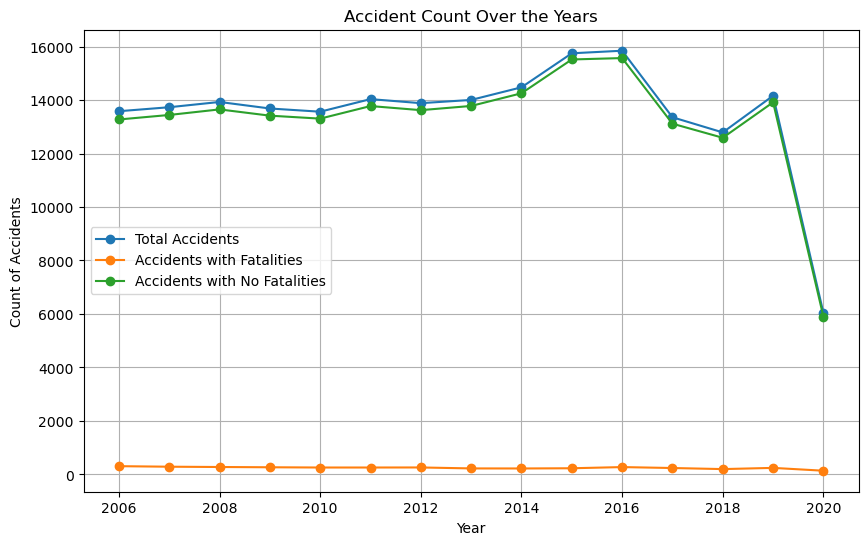

In [4]:
# Convert the 'ACCIDENTDATE' column to a datetime object
accident_df['ACCIDENTDATE'] = pd.to_datetime(accident_df['ACCIDENTDATE'], format='%d/%m/%Y')

# Extract the year from the 'ACCIDENTDATE' column
accident_df['Year'] = accident_df['ACCIDENTDATE'].dt.year

# Group by year and count the number of accidents
yearly_counts = accident_df.groupby('Year')['ACCIDENT_NO'].count()

# Group by year and count the number of accidents with fatalities (NO_PERSONS_KILLED > 0)
fatal_counts = accident_df[accident_df['NO_PERSONS_KILLED'] > 0].groupby('Year')['ACCIDENT_NO'].count()

# Group by year and count the number of accidents with no fatalities (NO_PERSONS_KILLED == 0)
non_fatal_counts = accident_df[accident_df['NO_PERSONS_KILLED'] == 0].groupby('Year')['ACCIDENT_NO'].count()

# Create a line chart with multiple lines
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', label='Total Accidents')
plt.plot(fatal_counts.index, fatal_counts.values, marker='o', linestyle='-', label='Accidents with Fatalities')
plt.plot(non_fatal_counts.index, non_fatal_counts.values, marker='o', linestyle='-', label='Accidents with No Fatalities')
plt.title('Accident Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Accidents')
plt.legend()
plt.grid(True)

# Save the plot as an image file
plt.savefig('../Exploratory_Analysis_Output/road_accidents_linechart.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()


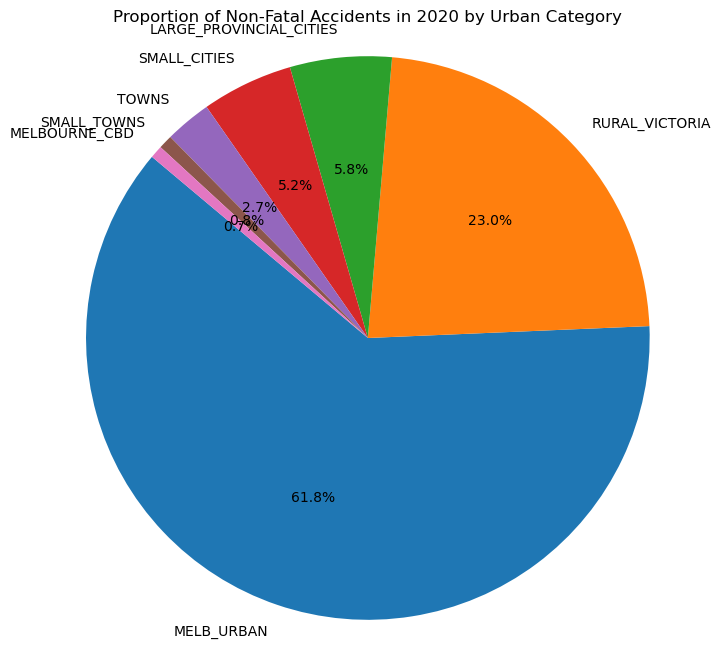

In [5]:
# Filter data for the year 2020 and where 'NO_PERSONS_KILLED' is 0
filtered_df = accident_df[(accident_df['Year'] == 2020) & (accident_df['NO_PERSONS_KILLED'] == 0)]

# Group by 'DEG_URBAN_NAME' and count the number of accidents
urban_counts = filtered_df['DEG_URBAN_NAME'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(urban_counts, labels=urban_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Non-Fatal Accidents in 2020 by Urban Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the plot as an image file
plt.savefig('../Exploratory_Analysis_Output/nonfatal_Urban_piechart.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()

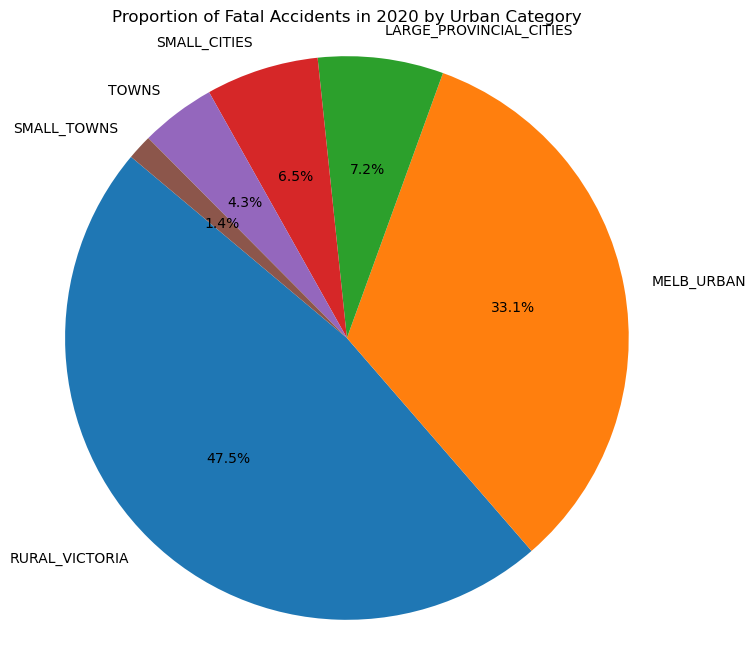

In [6]:
# Filter data for the year 2020 and where 'NO_PERSONS_KILLED' is greater than 0 (indicating fatalities)
filtered_df = accident_df[(accident_df['Year'] == 2020) & (accident_df['NO_PERSONS_KILLED'] > 0)]

# Group by 'DEG_URBAN_NAME' and count the number of fatal accidents
urban_counts = filtered_df['DEG_URBAN_NAME'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(urban_counts, labels=urban_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Fatal Accidents in 2020 by Urban Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the plot as an image file
plt.savefig('../Exploratory_Analysis_Output/fatal_Urban_piechart.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()

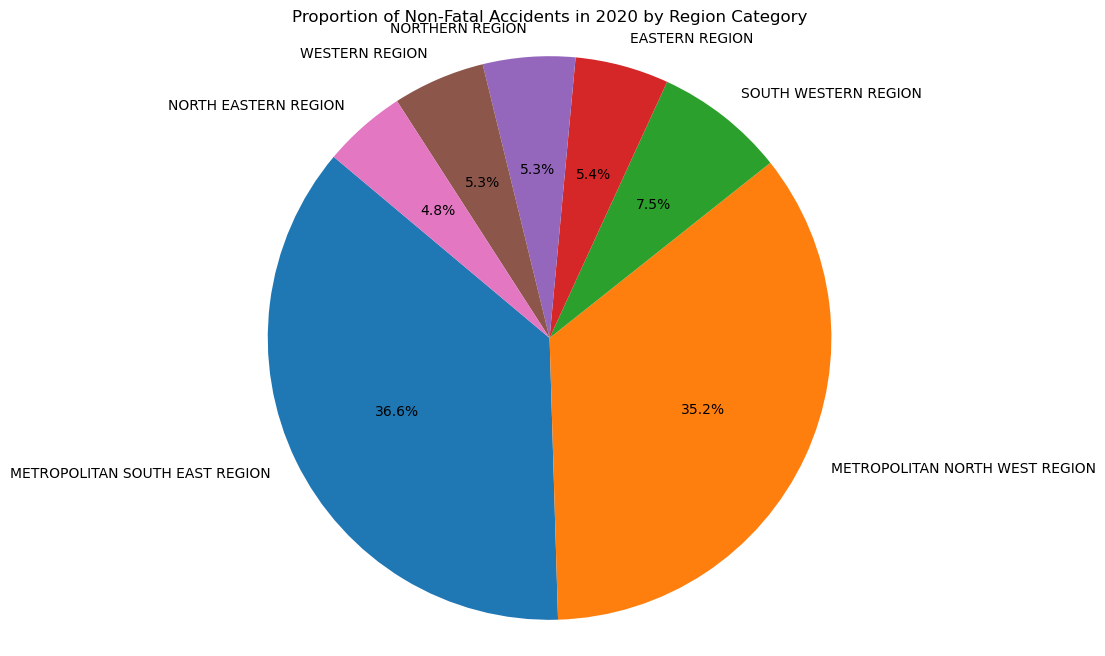

In [7]:
# Filter data for the year 2020 and where 'NO_PERSONS_KILLED' is 0
filtered_df = accident_df[(accident_df['Year'] == 2020) & (accident_df['NO_PERSONS_KILLED'] == 0)]

# Group by 'REGION_NAME' and count the number of accidents
region_counts = filtered_df['REGION_NAME'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Non-Fatal Accidents in 2020 by Region Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the plot as an image file
plt.savefig('../Exploratory_Analysis_Output/nonfatal_region_piechart.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()

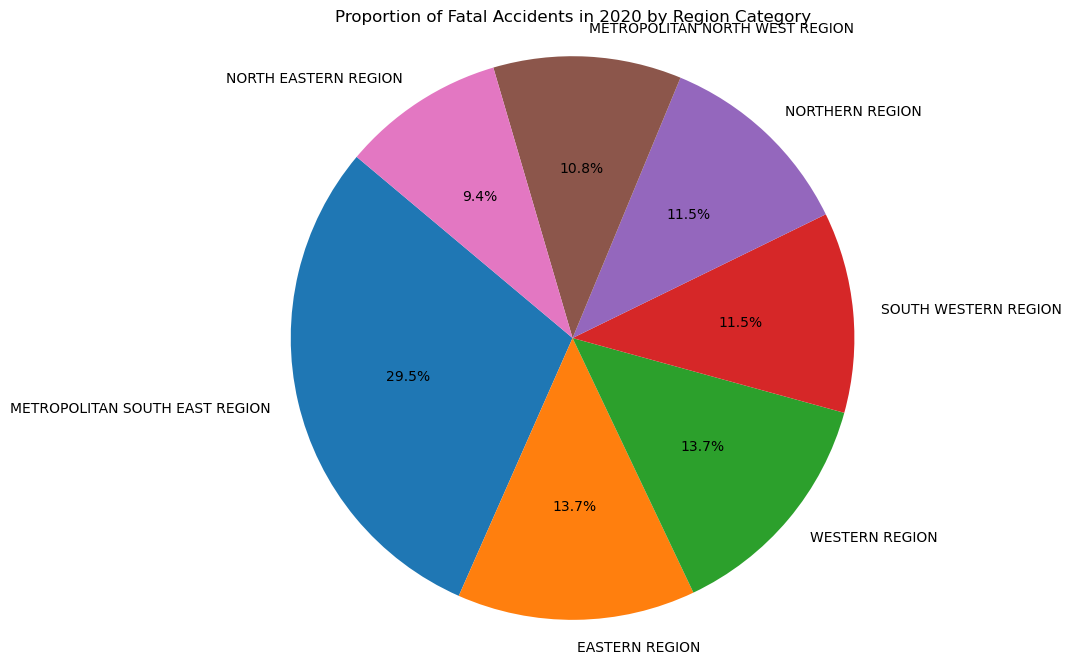

In [8]:
# Filter data for the year 2020 and where 'NO_PERSONS_KILLED' is greater than 0 (indicating fatalities)
filtered_df = accident_df[(accident_df['Year'] == 2020) & (accident_df['NO_PERSONS_KILLED'] > 0)]

# Group by 'REGION_NAME_NAME' and count the number of fatal accidents
region_counts = filtered_df['REGION_NAME'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Fatal Accidents in 2020 by Region Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the plot as an image file
plt.savefig('../Exploratory_Analysis_Output/fatal_region_piechart.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()

In [9]:
# Load the CSV file with latitude and longitude data
person_path = Path('../Cleaned_Datasets/person_cleaned.csv')
# Read the CSV file
person_data = pd.read_csv(person_path, low_memory=False)

In [10]:
person_df = pd.DataFrame(person_data)
person_df.head()

,ACCIDENT_NO,PERSON_ID,VEHICLE_ID,ACCIDENT_VEHICLE_ID,SEX,AGE,Age_Group,INJ_LEVEL,Inj_Level_Desc,SEATING_POSITION,HELMET_BELT_WORN,ROAD_USER_TYPE,Road_User_Type_Desc,LICENCE_STATE,PEDEST_MOVEMENT,POSTCODE,TAKEN_HOSPITAL,EJECTED_CODE
0,T20060000010,01,A,T20060000010A,F,NaN,unknown,4,Not injured,LF,1,3,Passengers,,0,3130.0,,0
1,T20060000010,02,C,T20060000010C,M,43.0,40-49,4,Not injured,LF,1,3,Passengers,,0,7310.0,,0
2,T20060000010,03,C,T20060000010C,M,22.0,22-25,4,Not injured,LR,1,3,Passengers,,0,7310.0,,0
3,T20060000010,A,A,T20060000010A,M,72.0,70+,4,Not injured,D,1,2,Drivers,V,0,3130.0,,0
4,T20060000010,B,B,T20060000010B,F,62.0,60-64,3,Other injury,D,1,2,Drivers,V,0,NaN,N,0


In [11]:
# merge accident and person data
merge1_df = pd.merge(accident_df, person_df, on='ACCIDENT_NO', how='left')
merge1_df.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident_Type_Desc,DAY_OF_WEEK,Day_Week_Description,DCA_CODE,DCA_Description,LIGHT_CONDITION,...,Inj_Level_Desc,SEATING_POSITION,HELMET_BELT_WORN,ROAD_USER_TYPE,Road_User_Type_Desc,LICENCE_STATE,PEDEST_MOVEMENT,POSTCODE,TAKEN_HOSPITAL,EJECTED_CODE
0,T20060000010,2006-01-13,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,...,Not injured,LF,1,3,Passengers,,0,3130.0,,0
1,T20060000010,2006-01-13,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,...,Not injured,LF,1,3,Passengers,,0,7310.0,,0
2,T20060000010,2006-01-13,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,...,Not injured,LR,1,3,Passengers,,0,7310.0,,0
3,T20060000010,2006-01-13,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,...,Not injured,D,1,2,Drivers,V,0,3130.0,,0
4,T20060000010,2006-01-13,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,...,Other injury,D,1,2,Drivers,V,0,NaN,N,0


C:\Users\Tamas\AppData\Local\Temp\ipykernel_16480\718280595.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age_Group'] = pd.Categorical(filtered_df['Age_Group'], categories=age_group_order, ordered=True)


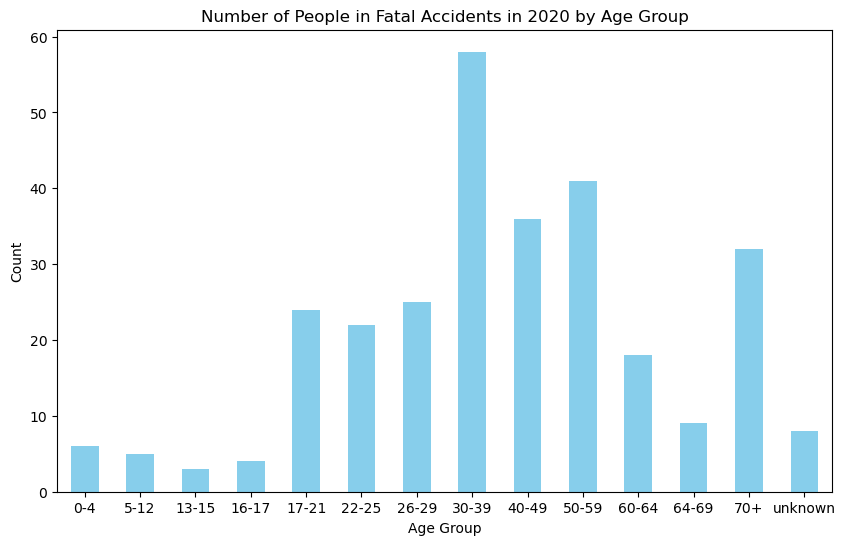

In [12]:
# Filter data for the year 2020 and where 'NO_PERSONS_KILLED' is greater than or equal to 1 (fatal accidents)
filtered_df = merge1_df[(merge1_df['Year'] == 2020) & (merge1_df['NO_PERSONS_KILLED'] >= 1)]

age_group_order = ['0-4','5-12','13-15','16-17','17-21', '22-25', '26-29','30-39', '40-49','50-59', '60-64','64-69', '70+',
        'unknown']

# Create a Categorical data type with the custom order
filtered_df['Age_Group'] = pd.Categorical(filtered_df['Age_Group'], categories=age_group_order, ordered=True)

# Group by 'Age_Group' and sum the number of people in fatal accidents
fatal_counts = filtered_df.groupby('Age_Group')['ACCIDENT_NO'].count()

# Create a bar chart
plt.figure(figsize=(10, 6))
fatal_counts.plot(kind='bar', color='skyblue')
plt.title('Number of People in Fatal Accidents in 2020 by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Save the plot as an image file
plt.savefig('../Exploratory_Analysis_Output/fatal_age_barchart.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()

C:\Users\Tamas\AppData\Local\Temp\ipykernel_16480\1301164405.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age_Group'] = pd.Categorical(filtered_df['Age_Group'], categories=age_group_order, ordered=True)


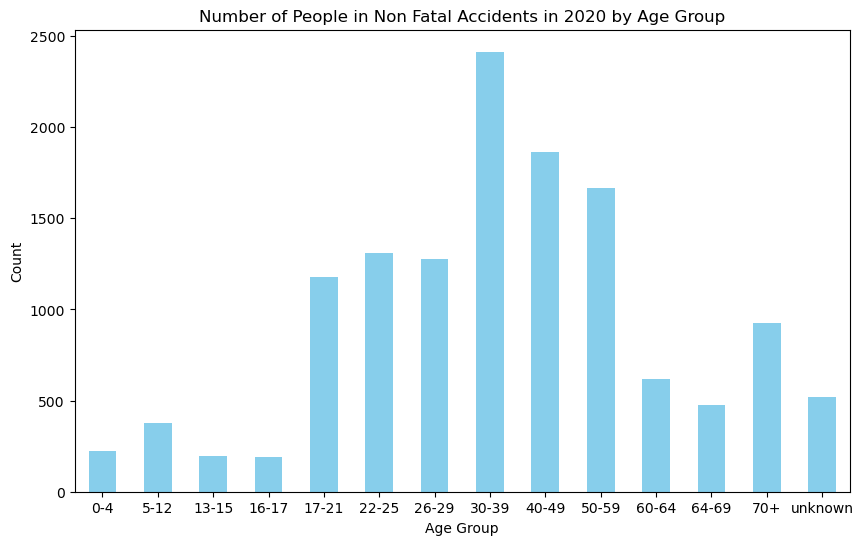

In [13]:
# Filter data for the year 2020 and where 'NO_PERSONS_KILLED' is equal to 0 (non fatal accidents)
filtered_df = merge1_df[(merge1_df['Year'] == 2020) & (merge1_df['NO_PERSONS_KILLED'] == 0)]

age_group_order = ['0-4','5-12','13-15','16-17','17-21', '22-25', '26-29','30-39', '40-49','50-59', '60-64','64-69', '70+',
        'unknown']

# Create a Categorical data type with the custom order
filtered_df['Age_Group'] = pd.Categorical(filtered_df['Age_Group'], categories=age_group_order, ordered=True)

# Group by 'Age_Group' and sum the number of people in fatal accidents
fatal_counts = filtered_df.groupby('Age_Group')['ACCIDENT_NO'].count()

# Create a bar chart
plt.figure(figsize=(10, 6))
fatal_counts.plot(kind='bar', color='skyblue')
plt.title('Number of People in Non Fatal Accidents in 2020 by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Save the plot as an image file
plt.savefig('../Exploratory_Analysis_Output/nonfatal_age_barchart.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()

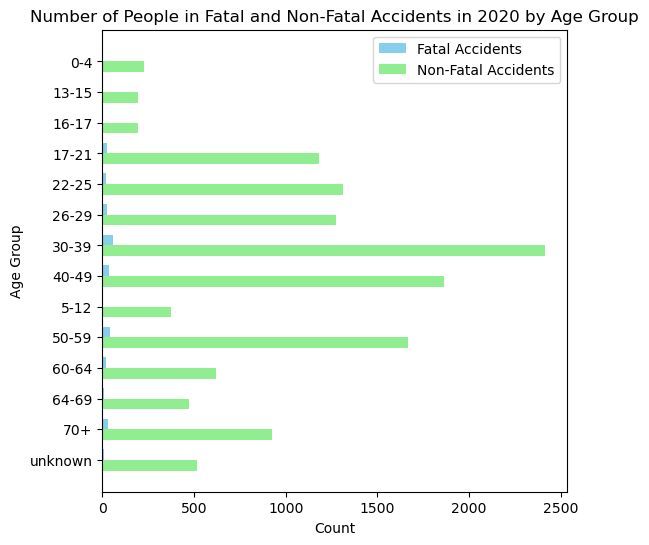

In [18]:
# Filter data for the year 2020
data_2020 = merge1_df[merge1_df['Year'] == 2020]

# Calculate the counts of people in fatal and non-fatal accidents by age group
fatal_counts = data_2020[data_2020['NO_PERSONS_KILLED'] >= 1].groupby('Age_Group')['ACCIDENT_NO'].count()
non_fatal_counts = data_2020[data_2020['NO_PERSONS_KILLED'] == 0].groupby('Age_Group')['ACCIDENT_NO'].count()

# Create a horizontal bar chart displaying both sets of counts side by side
fig, ax = plt.subplots(figsize=(6, 6))
bar_height = 0.35
index = range(len(fatal_counts))

bar1 = ax.barh(index, fatal_counts, bar_height, label='Fatal Accidents', color='skyblue')
bar2 = ax.barh([i + bar_height for i in index], non_fatal_counts, bar_height, label='Non-Fatal Accidents', color='lightgreen')

ax.set_ylabel('Age Group')
ax.set_xlabel('Count')
ax.set_title('Number of People in Fatal and Non-Fatal Accidents in 2020 by Age Group')
ax.set_yticks([i + bar_height / 2 for i in index])
ax.set_yticklabels(fatal_counts.index)
ax.invert_yaxis()  # Invert the y-axis to display the highest age group at the top
ax.legend()

# Save the plot as an image file
plt.savefig('../Exploratory_Analysis_Output/all_age_horizontal_barchart.png', dpi=300, bbox_inches='tight')

plt.show()